In [1]:
#Antes de empezar, importo las librerias y las funciones que me van a servir para las limpiezas.
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Estar en movimiento en el agua puede acentuar el riesgo de ser atacado por un tiburón en el agua?

In [2]:
df_move = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_move.csv", index_col=1,encoding='latin-1')

In [3]:
df_move['RMovement'].where(~(df_move.RMovement == 1), other="less than 5 km/h", inplace=True)

In [4]:
df_move['RMovement'].where(~(df_move.RMovement == 2), other="5 to 10km/h", inplace=True)

In [5]:
df_move['RMovement'].where(~(df_move.RMovement == 3), other="more than 10km/h", inplace=True)

In [6]:
df_move.head(50)

,Country,Activity_,RMovement
Year,,,
1975,SOUTH AFRICA,attempting,less than 5 km/h
1988,SOUTH AFRICA,attempting,less than 5 km/h
2001,BRAZIL,attempting,less than 5 km/h
2011,MEXICO,attempting,less than 5 km/h
1965,BAHAMAS,attempting,less than 5 km/h
1956,AUSTRALIA,attempting,less than 5 km/h
1959,SOLOMON ISLANDS,bathing,less than 5 km/h
2012,NIGERIA,bathing,less than 5 km/h
1940,PANAMA,bathing,less than 5 km/h


In [7]:
print(df_move.shape)

(1163, 3)


Text(0.5, 1.0, 'Number of cases per speed during 1900-2018 period')

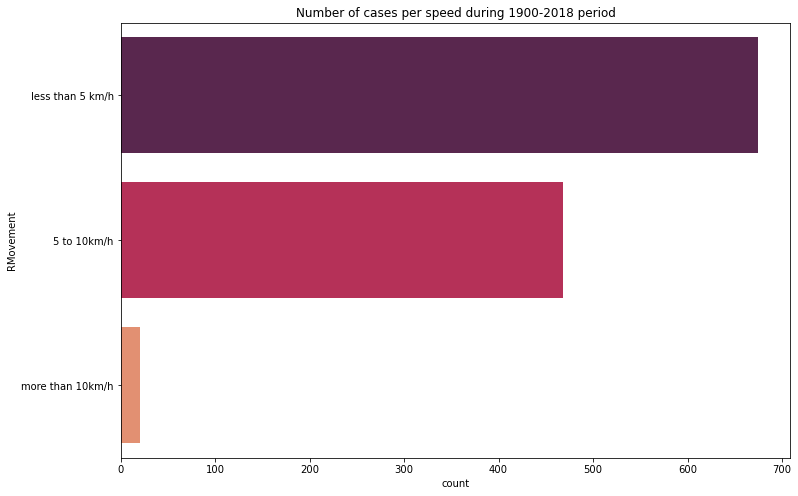

In [58]:
fig, ax = plt.subplots(figsize = (12, 8))

ax = sns.countplot(y=df_move.RMovement, palette="rocket")

ax.set_title("Number of cases per speed during 1900-2018 period")

In [10]:
df_move.RMovement.value_counts()

less than 5 km/h    675
5 to 10km/h         468
more than 10km/h     20
Name: RMovement, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_move = df_move.reset_index()

### De un total de 1163 casos reportados con descripción en la actividad que estaba realizando el sujeto desde el año 1900, un total de 468 han sido contra un sujeto aparentemente en movimiento, que junto con los 20 que probablemente fuesen en barco, suman un total de 488 casos.

Text(0.5, 1.0, 'Number of cases per speed during 1900-2018 period')

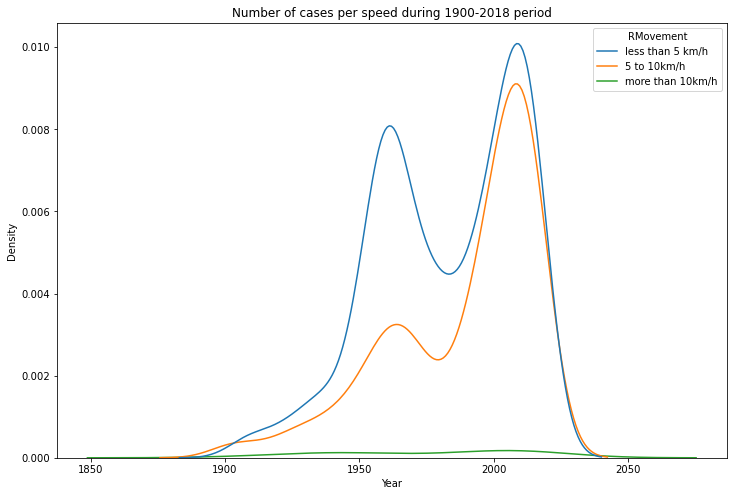

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.kdeplot(x=df_move.Year, hue=df_move.RMovement)
ax.set_title("Density of cases per speed during 1900-2018 period")

Text(0.5, 1.0, 'Density of cases per speed during 1900-2018 period')

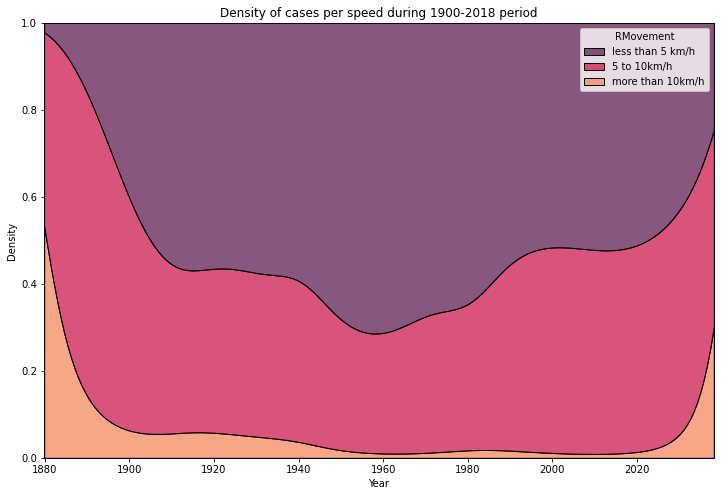

In [59]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.kdeplot(x=df_move.Year, hue=df_move.RMovement, multiple="fill", palette="rocket")
ax.set_title("Density of cases per speed during 1900-2018 period")

Text(0.5, 1.0, 'Count of cases per speed during 1900-2018 period')

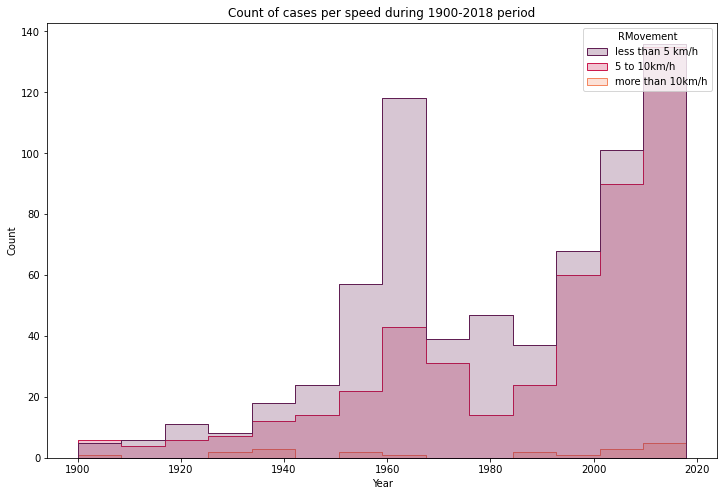

In [42]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.histplot(x=df_move.Year, hue=df_move.RMovement, element="step", palette="rocket")
ax.set_title("Count of cases per speed during 1900-2018 period")

# 2. Se puede decir que los deportes acuáticos son los que más riesgo de letalidad tienen en cuanto a ataques de tiburon se refiere?

In [16]:
df_lethal = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_lethal.csv", index_col=1,encoding='latin-1')

In [17]:
df_lethal= df_lethal.reset_index()

In [18]:
df_lethal.head(30)

,Year,Fatal,ActivityType
0,1975,N,otros
1,1988,N,otros
2,2001,U,otros
3,2011,N,otros
4,1965,N,otros
5,1956,N,otros
6,1959,Y,otros
7,2012,N,otros
8,1940,Y,otros
9,1905,N,otros


Text(0.5, 1.0, 'Fatality per activity (1900-2018)')

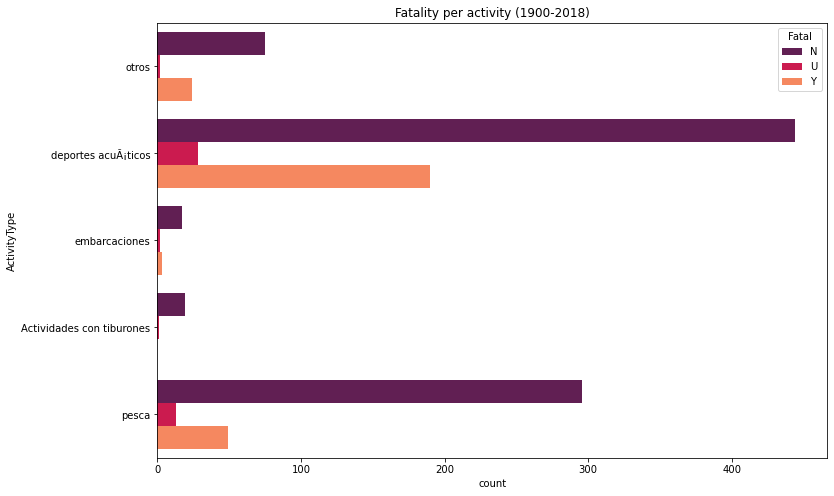

In [43]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(y=df_lethal.ActivityType, hue=df_lethal.Fatal, saturation=10, palette="rocket")
ax.set_title("Fatality per activity (1900-2018)")

Text(0.5, 1.0, 'Fatality count per activity (1900-2018)')

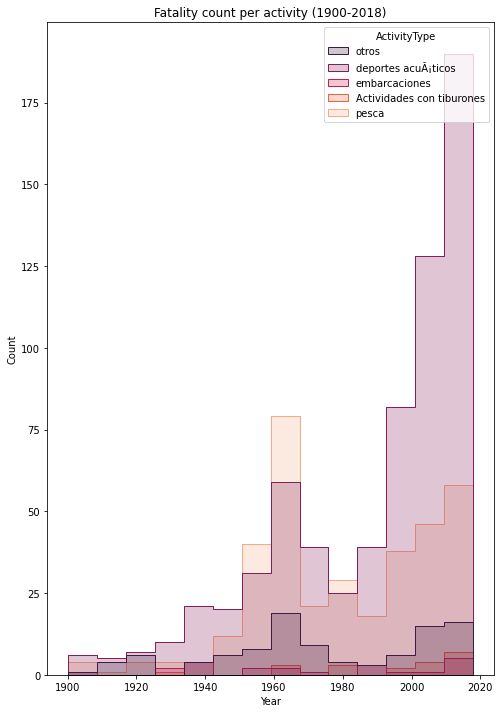

In [45]:
fig, ax = plt.subplots(figsize = (8,12))
sns.histplot(x=df_lethal.Year, hue=df_lethal.ActivityType, element="step", palette="rocket")
ax.set_title("Fatality count per activity (1900-2018)")

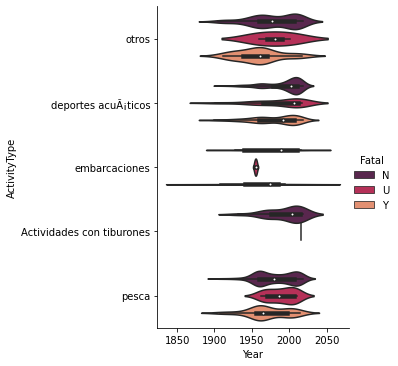

In [62]:
ax=sns.catplot(x="Year", y="ActivityType", hue="Fatal", kind="violin", data=df_lethal, palette="rocket")

In [22]:
df_lethal['Year'] = df_lethal['Year'].astype(int)


Text(0.5, 1.0, 'Fatality count per activity (1900-2018)')

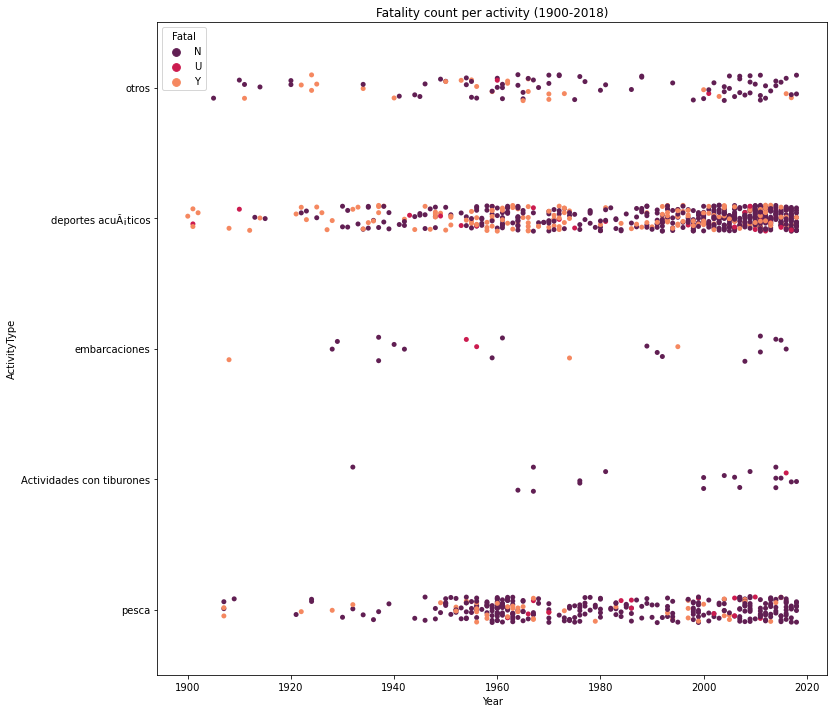

In [52]:
fig, ax = plt.subplots(figsize = (12,12))
sns.stripplot(x="Year", y="ActivityType", hue="Fatal", data=df_lethal,palette="rocket")
ax.set_title("Fatality count per activity (1900-2018)")

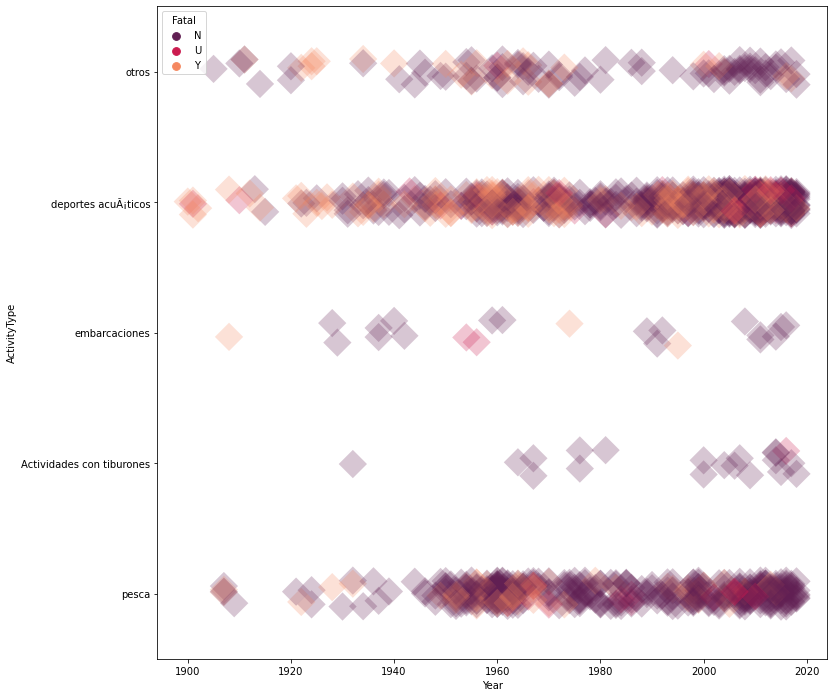

In [53]:
fig, ax = plt.subplots(figsize = (12,12))
ax =  sns.stripplot(x="Year", y="ActivityType", hue="Fatal",
                   data=df_lethal, palette="rocket", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

# 3.En que lugares existe más posibilidad de ser atacado por un tiburón?

In [25]:
df_Country = pd.read_csv("/Users/luissanchezdeleon/ironhack/Proyecto/Data/df_Country.csv", index_col=1,encoding='latin-1')

In [26]:
df_Country = df_Country.reset_index()

In [27]:
df_Country.head()

,Fatal,Country,Year
0,N,USA,2018
1,N,USA,2018
2,N,USA,2018
3,N,AUSTRALIA,2018
4,N,MEXICO,2018


In [28]:
value_counts = df_Country['Country'].value_counts()
remote_cases = value_counts[value_counts <= 25].index
df_Country_2 = df_Country[~df_Country.Country.isin(remote_cases)]
df_Country_2["Country"].value_counts()

USA                 1711
AUSTRALIA            909
SOUTH AFRICA         453
NEW ZEALAND           78
BAHAMAS               69
BRAZIL                61
PAPUA NEW GUINEA      57
MEXICO                44
ITALY                 41
REUNION               37
MOZAMBIQUE            31
SPAIN                 27
Name: Country, dtype: int64

Text(0.5, 1.0, 'Fatality count per contry (1700-2018)')

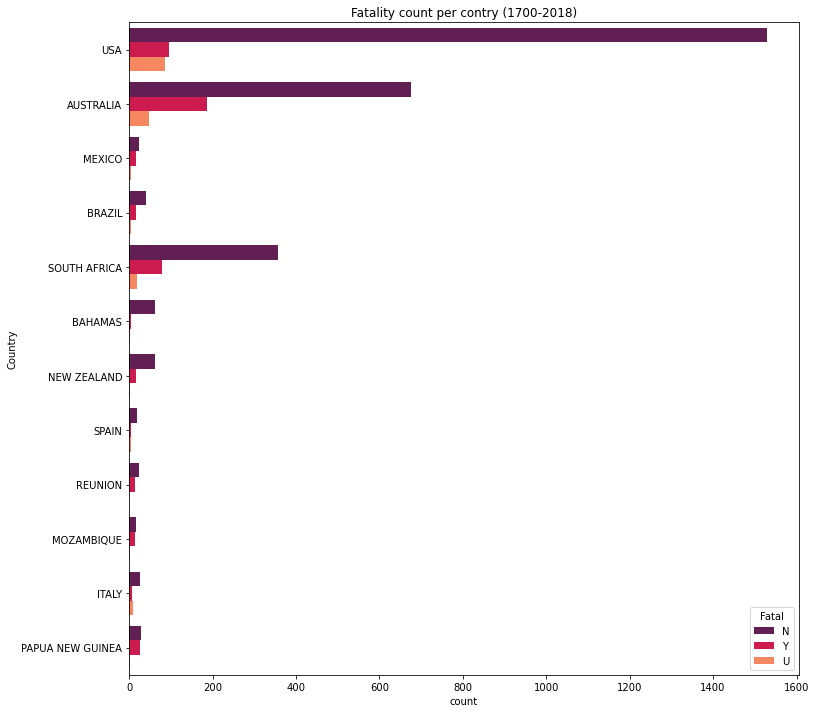

In [56]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(y=df_Country_2.Country, hue=df_Country_2.Fatal, saturation=10, palette="rocket")
ax.set_title("Fatality count per contry (1700-2018)")

Text(0.5, 1.0, 'Fatality count per contry (1700-2018)')

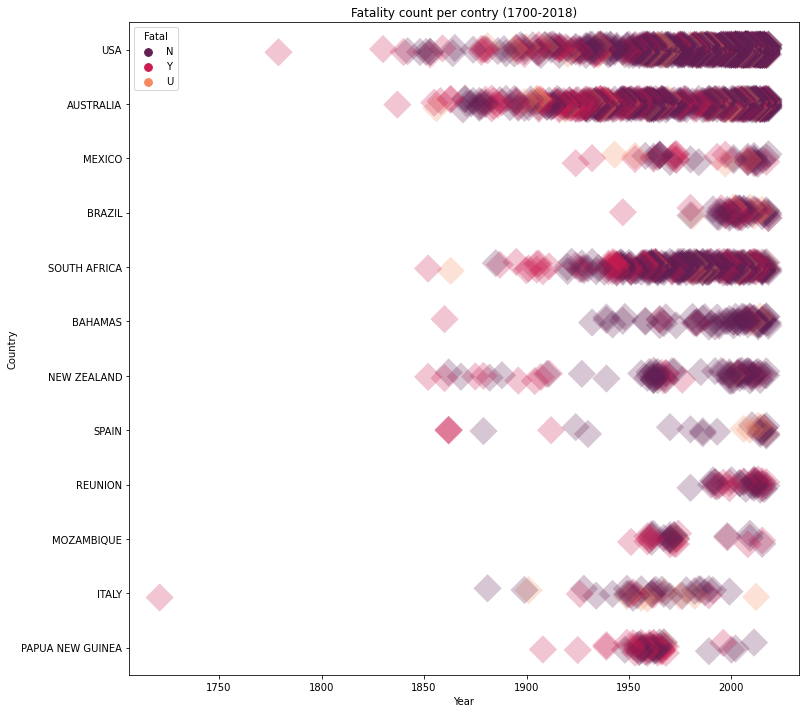

In [57]:
fig, ax = plt.subplots(figsize = (12,12))
ax =  sns.stripplot(x="Year", y="Country", hue="Fatal",
                   data=df_Country_2, palette="rocket", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
ax.set_title("Fatality count per contry (1700-2018)")